In [50]:
import pandas as pd
from matplotlib import pyplot
from pandas import datetime
from pandas.plotting import autocorrelation_plot


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


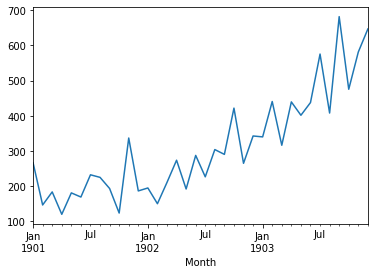

In [41]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('C:/Users/William/shampoo.csv', header= 0, parse_dates= [0], index_col=0,
                    squeeze= True, date_parser= parser)
print(series.head())
series.plot()
pyplot.show()

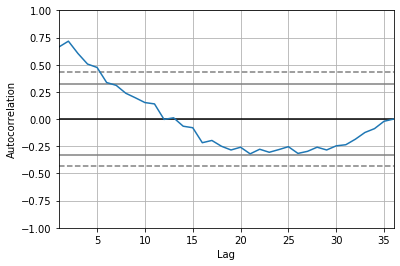

In [16]:
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')
series= pd.read_csv('C:/Users/William/shampoo.csv', header= 0, parse_dates=[0],
                   index_col=0, squeeze= True, date_parser= parser)
autocorrelation_plot(series)
pyplot.show()

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 02 Feb 2020   AIC                            406.340
Time:                        18:55:26   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

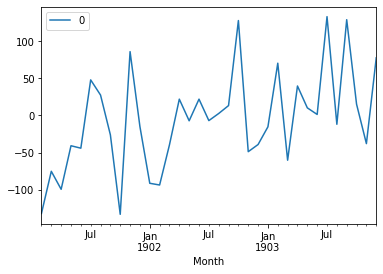

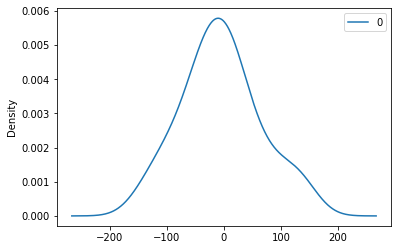

                0
count   35.000000
mean    -5.495190
std     68.132883
min   -133.296590
25%    -42.477882
50%     -7.186531
75%     24.748366
max    133.237980


In [23]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series= pd.read_csv('C:/Users/William/shampoo.csv', header= 0, parse_dates= [0], index_col= 0, 
                    squeeze= True, date_parser= parser )
#fit model

model= ARIMA(series, order = (5,1,0))

model_fit= model.fit(disp= 0)
print(model_fit.summary())

#plot residual errors

residuals= DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Predicted = 349.117724, expected= 342.300000
Predicted = 306.513044, expected= 339.700000
Predicted = 387.376403, expected= 440.400000
Predicted = 348.154199, expected= 315.900000
Predicted = 386.308847, expected= 439.300000
Predicted = 356.082118, expected= 401.300000
Predicted = 446.379483, expected= 437.400000
Predicted = 394.737306, expected= 575.500000
Predicted = 434.915549, expected= 407.600000
Predicted = 507.923488, expected= 682.000000
Predicted = 435.482867, expected= 475.300000
Predicted = 652.743772, expected= 581.300000
Predicted = 546.343419, expected= 646.900000
Test MSE: 6958.324


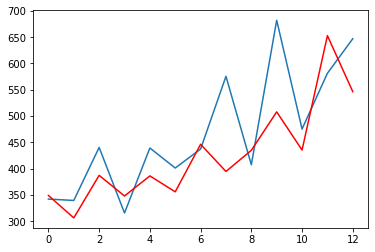

In [30]:
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('C:/Users/William/shampoo.csv', header=0, parse_dates=[0], index_col=0,
                    squeeze=True, date_parser= parser)

X= series.values
size=int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model= ARIMA(history, order= (5,1,0))
    model_fit = model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Predicted = %f, expected= %f' %(yhat, obs))
error= mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
    
pyplot.plot(test)
pyplot.plot(predictions, color= 'red')
pyplot.show()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64


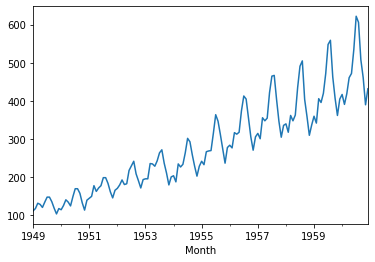

In [58]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')
data= pd.read_csv('C:/Users/William/AirPassengers.csv',header= 0,parse_dates=[0], index_col=0,
                 squeeze= True, date_parser= parser)
print(data.head(10))

data.plot()
pyplot.show()

In [59]:
data['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [69]:
# using Dick Fuller
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determine rolling statistics
    
    rolemean=pd.rolling_mean(timeseries, window=12)
    rolstd= pd.rolling_std(timeseries, window=12)
    #plot rolling statistics:
    orig=plt.plot(timeseries, color='blue', label = 'Original')
    mean=plt.plot(rolmean, color= 'red', lable= 'Rolling Mean')
    std= plt.plot(rolstd, color= 'black', label= 'Rolling Std')
    plt.legend(loc= 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    # perform Dickey-Fuller test:
    
    print ('Results of Dickey- Fuller Test:')
    dftest = adfuller(timeseries, atuolag= 'AIC')
    dfoutput= pd.data(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key]= value
        print (dfoutput)